In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-mar-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-mar-2022/train.csv
/kaggle/input/tabular-playground-series-mar-2022/test.csv


In [2]:
train = pd.read_csv("../input/tabular-playground-series-mar-2022/train.csv")
test = pd.read_csv("../input/tabular-playground-series-mar-2022/test.csv")
submission = pd.read_csv("../input/tabular-playground-series-mar-2022/sample_submission.csv")

In [3]:
print(train.shape)
train.head()

(848835, 6)


,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60


In [4]:
print(test.shape)
test.head()

(2340, 5)


,row_id,time,x,y,direction
0,848835,1991-09-30 12:00:00,0,0,EB
1,848836,1991-09-30 12:00:00,0,0,NB
2,848837,1991-09-30 12:00:00,0,0,SB
3,848838,1991-09-30 12:00:00,0,1,EB
4,848839,1991-09-30 12:00:00,0,1,NB


In [5]:
print(submission.shape)
submission.head()

(2340, 2)


,row_id,congestion
0,848835,0.0
1,848836,0.0
2,848837,0.0
3,848838,0.0
4,848839,0.0


In [6]:
def feature_engineering(df):
    df["time"] = pd.to_datetime(df["time"])
    df["month"] = df["time"].dt.month
    df["weekday"] = df["time"].dt.weekday
    df["hour"] = df["time"].dt.hour
    df["minute"] = df["time"].dt.minute
    df["is_month_start"] = df["time"].dt.is_month_start.astype("int")
    df["is_month_end"] = df["time"].dt.is_month_end.astype("int")
    df["is_weekend"] = (df["time"].dt.dayofweek > 4).astype("int")
    df["is_afternoon"] = (df["time"].dt.hour > 12).astype("int")

In [7]:
for data in [train ,test]:
    feature_engineering(data)

In [8]:
train.head()

,row_id,time,x,y,direction,congestion,month,weekday,hour,minute,is_month_start,is_month_end,is_weekend,is_afternoon
0,0,1991-04-01,0,0,EB,70,4,0,0,0,1,0,0,0
1,1,1991-04-01,0,0,NB,49,4,0,0,0,1,0,0,0
2,2,1991-04-01,0,0,SB,24,4,0,0,0,1,0,0,0
3,3,1991-04-01,0,1,EB,18,4,0,0,0,1,0,0,0
4,4,1991-04-01,0,1,NB,60,4,0,0,0,1,0,0,0


In [9]:
test.head()

,row_id,time,x,y,direction,month,weekday,hour,minute,is_month_start,is_month_end,is_weekend,is_afternoon
0,848835,1991-09-30 12:00:00,0,0,EB,9,0,12,0,0,1,0,0
1,848836,1991-09-30 12:00:00,0,0,NB,9,0,12,0,0,1,0,0
2,848837,1991-09-30 12:00:00,0,0,SB,9,0,12,0,0,1,0,0
3,848838,1991-09-30 12:00:00,0,1,EB,9,0,12,0,0,1,0,0
4,848839,1991-09-30 12:00:00,0,1,NB,9,0,12,0,0,1,0,0


## Data Visualizing

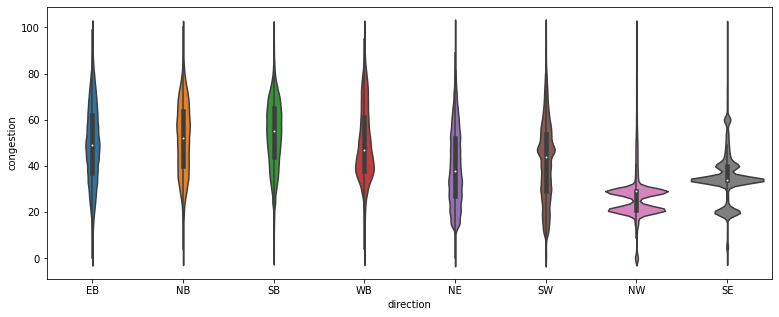

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,5))
sns.violinplot(x="direction", y="congestion", data=train);

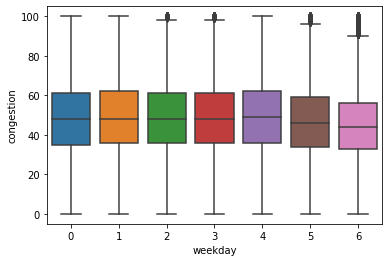

In [11]:
sns.boxplot(x="weekday", y="congestion", data=train);

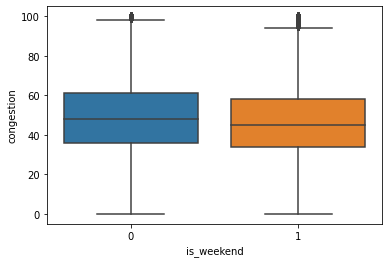

In [12]:
sns.boxplot(x="is_weekend", y="congestion", data=train);

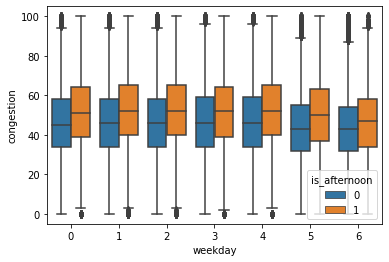

In [13]:
sns.boxplot(x="weekday", y="congestion", hue="is_afternoon", data=train);

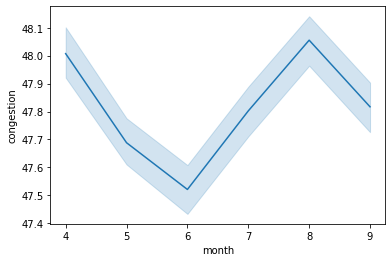

In [14]:
sns.lineplot(x="month", y="congestion", data=train);

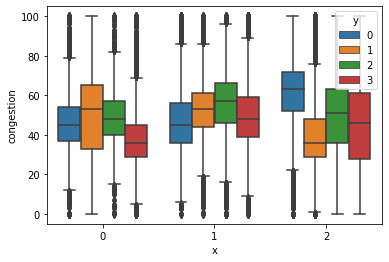

In [15]:
sns.boxplot(x="x", y="congestion", hue="y", data=train);

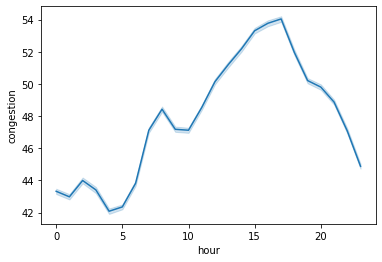

In [16]:
sns.lineplot(x="hour", y="congestion", data=train);

## Data Preprocessing

In [17]:
train.head()

,row_id,time,x,y,direction,congestion,month,weekday,hour,minute,is_month_start,is_month_end,is_weekend,is_afternoon
0,0,1991-04-01,0,0,EB,70,4,0,0,0,1,0,0,0
1,1,1991-04-01,0,0,NB,49,4,0,0,0,1,0,0,0
2,2,1991-04-01,0,0,SB,24,4,0,0,0,1,0,0,0
3,3,1991-04-01,0,1,EB,18,4,0,0,0,1,0,0,0
4,4,1991-04-01,0,1,NB,60,4,0,0,0,1,0,0,0


In [18]:
test.head()

,row_id,time,x,y,direction,month,weekday,hour,minute,is_month_start,is_month_end,is_weekend,is_afternoon
0,848835,1991-09-30 12:00:00,0,0,EB,9,0,12,0,0,1,0,0
1,848836,1991-09-30 12:00:00,0,0,NB,9,0,12,0,0,1,0,0
2,848837,1991-09-30 12:00:00,0,0,SB,9,0,12,0,0,1,0,0
3,848838,1991-09-30 12:00:00,0,1,EB,9,0,12,0,0,1,0,0
4,848839,1991-09-30 12:00:00,0,1,NB,9,0,12,0,0,1,0,0


In [19]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

train["direction"] = lbe.fit_transform(train["direction"])
train["weekday"] = lbe.fit_transform(train["weekday"])
train

,row_id,time,x,y,direction,congestion,month,weekday,hour,minute,is_month_start,is_month_end,is_weekend,is_afternoon
0,0,1991-04-01 00:00:00,0,0,0,70,4,0,0,0,1,0,0,0
1,1,1991-04-01 00:00:00,0,0,1,49,4,0,0,0,1,0,0,0
2,2,1991-04-01 00:00:00,0,0,4,24,4,0,0,0,1,0,0,0
3,3,1991-04-01 00:00:00,0,1,0,18,4,0,0,0,1,0,0,0
4,4,1991-04-01 00:00:00,0,1,1,60,4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,1,54,9,0,11,40,0,1,0,0
848831,848831,1991-09-30 11:40:00,2,3,2,28,9,0,11,40,0,1,0,0
848832,848832,1991-09-30 11:40:00,2,3,4,68,9,0,11,40,0,1,0,0
848833,848833,1991-09-30 11:40:00,2,3,6,17,9,0,11,40,0,1,0,0


In [20]:
test["direction"] = lbe.fit_transform(test["direction"])
test["weekday"] = lbe.fit_transform(test["weekday"])
test

,row_id,time,x,y,direction,month,weekday,hour,minute,is_month_start,is_month_end,is_weekend,is_afternoon
0,848835,1991-09-30 12:00:00,0,0,0,9,0,12,0,0,1,0,0
1,848836,1991-09-30 12:00:00,0,0,1,9,0,12,0,0,1,0,0
2,848837,1991-09-30 12:00:00,0,0,4,9,0,12,0,0,1,0,0
3,848838,1991-09-30 12:00:00,0,1,0,9,0,12,0,0,1,0,0
4,848839,1991-09-30 12:00:00,0,1,1,9,0,12,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,851170,1991-09-30 23:40:00,2,3,1,9,0,23,40,0,1,0,1
2336,851171,1991-09-30 23:40:00,2,3,2,9,0,23,40,0,1,0,1
2337,851172,1991-09-30 23:40:00,2,3,4,9,0,23,40,0,1,0,1
2338,851173,1991-09-30 23:40:00,2,3,6,9,0,23,40,0,1,0,1


In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
y = train["congestion"]
X = train.drop(["congestion","time"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Model Selection

## KNN

from sklearn.neighbors import KNeighborsRegressor

knn_params = {"n_neighbors" : np.arange(1,30,1)}

knn = KNeighborsRegressor()

knn_cv_model = GridSearchCV(knn, knn_params, cv=10)
knn_cv_model.fit(X_train, y_train)

knn_cv_model.best_params_["n_neighbors"]

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knn_tuned = KNeighborsRegressor(n_neighbors = 17)
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=17)

In [23]:
from sklearn.metrics import mean_squared_error

y_pred = knn_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

16.457485353660346

## Random Forests

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

rf_params = {"max_depth" : list(range(1,10)),
             "max_features" : [3,5,10,15],
             "n_estimators" : [100, 200, 500, 1000, 2000]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1)

rf_cv_model.fit(X_train, y_train)

rf_cv_model.best_params_

rf_tuned = RandomForestRegressor(max_depth = pd.Series(rf_cv_model.best_params_)[0],
                                 max_features = pd.Series(rf_cv_model.best_params_)[1],
                                 n_estimators = pd.Series(rf_cv_model.best_params_)[2])

In [25]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

8.389696524558241

In [27]:
rf_model.predict(X_train)

array([30.97, 51.62, 55.71, ..., 55.43, 57.75, 29.8 ])

In [28]:
y_train

193128    36
702744    51
144791    58
531977    45
739095    19
          ..
407630    29
27555     64
505211    54
401201    59
507061    29
Name: congestion, Length: 679068, dtype: int64

## XGBoost

In [29]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

In [30]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [31]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_pred, y_test))

9.301419277239242

In [32]:
xgb_model.predict(X_train)

array([26.357727, 59.32989 , 49.25298 , ..., 48.515884, 40.78318 ,
       28.442173], dtype=float32)

In [33]:
y_train

193128    36
702744    51
144791    58
531977    45
739095    19
          ..
407630    29
27555     64
505211    54
401201    59
507061    29
Name: congestion, Length: 679068, dtype: int64

## LightGBM

In [34]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

In [35]:
y_pred = lgbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_pred, y_test))

9.713176356647049

In [36]:
lgbm_model.predict(X_train)

array([30.24552684, 57.65007749, 50.84750949, ..., 47.14094725,
       36.92467825, 31.78627383])

In [37]:
y_train

193128    36
702744    51
144791    58
531977    45
739095    19
          ..
407630    29
27555     64
505211    54
401201    59
507061    29
Name: congestion, Length: 679068, dtype: int64

In [38]:
# random forest

In [39]:
test_fixed = test.drop("time", axis=1)

In [40]:

y_pred = rf_model.predict(test_fixed)
y_pred

array([56.95, 33.03, 52.71, ..., 64.72, 16.89, 37.03])

In [41]:
y_pred.shape

(2340,)

In [42]:
submission["congestion"] = y_pred

In [43]:
submission["congestion"] = submission["congestion"].apply(np.round)

In [44]:
submission["congestion"] = submission["congestion"].astype("int64")

In [45]:
submission = submission.set_index("row_id")

In [46]:
submission

,congestion
row_id,
848835,57
848836,33
848837,53
848838,30
848839,73
...,...
851170,63
851171,27
851172,65


In [47]:
submission.to_csv("./submission.csv")